In [1]:
from variables import *
from statsmodels.tsa.filters.hp_filter import hpfilter
from datetime import datetime

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [2]:
def get_nrows(plot_rsam: bool = False) -> int:
    n_stations = len(stations)*2 if plot_rsam else len(stations)
    
    if plot_from_magma:
        return n_stations+len(magma_df.columns)
    return n_stations

In [3]:
def merge_stations_and_eq_events(plot_rsam: bool = False) -> list[str]:
    if plot_from_magma:
        return magma_df.columns.tolist() + stations
    return stations

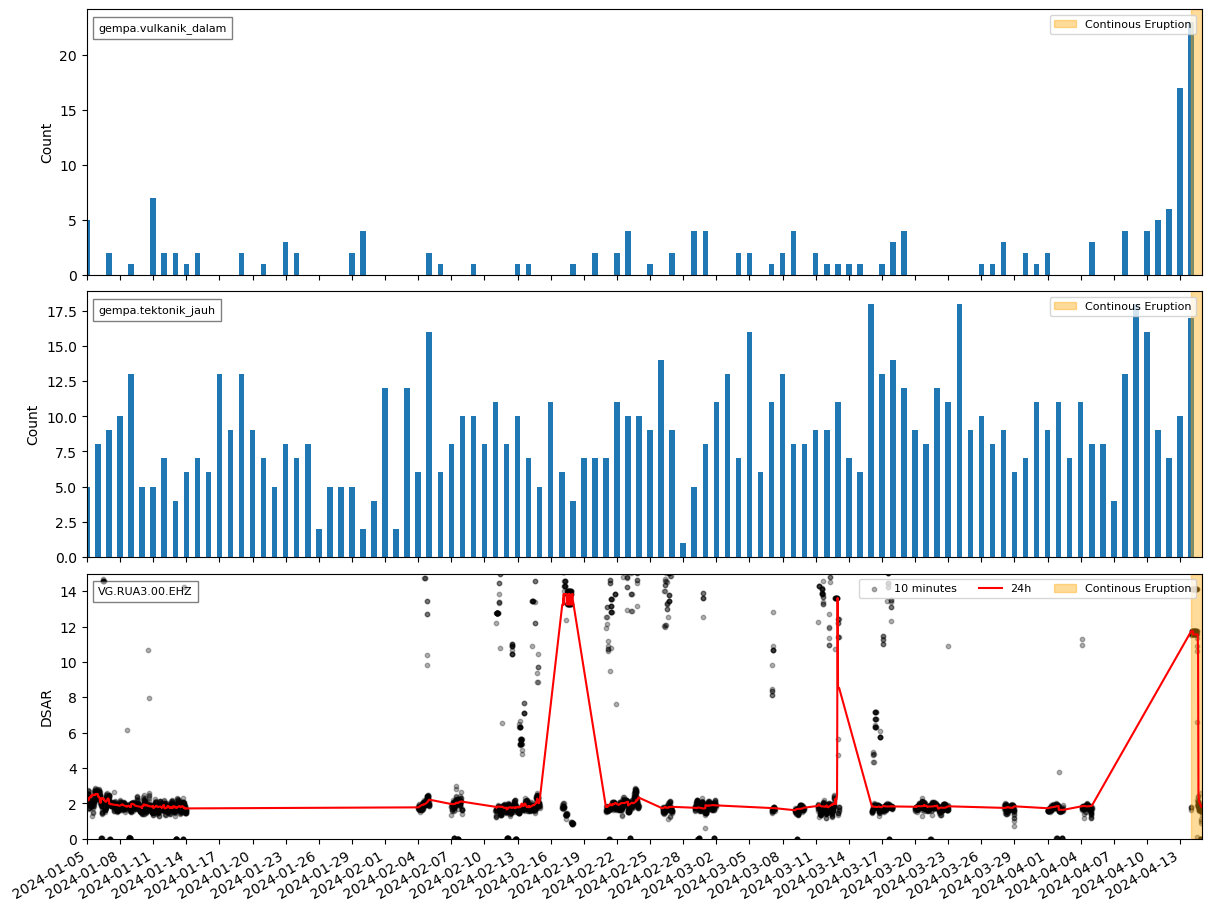

In [9]:
fig, axs = plt.subplots(nrows=get_nrows(), ncols=1, figsize=(12, 3*get_nrows()),
                        layout="constrained", sharex=True)

for index_key, station in enumerate(merge_stations_and_eq_events()):
    
    # (optional) Plotting VT events and eruptions from MAGMA Indonesia
    if plot_from_magma and index_key < len(magma_df.columns):
        axs[index_key].bar(magma_df.index, magma_df[station], width=0.5)
        
        axs[index_key].set_ylabel('Count')
            
        axs[index_key].xaxis.set_major_locator(mdates.DayLocator(interval=14))
    
    # Default plot
    else:
        df = pd.read_csv(os.path.join(dsar_directory, station, 'combined_{}_{}.csv'.format(resample_rule, station)), 
                     index_col='datetime', parse_dates=True)

        axs[index_key].scatter(df.index, df['DSAR_{}'.format(resample_rule)], c= 'k', alpha=0.3, s=10, label='10 minutes')
        
        # Smoothing using 24 Hour
        axs[index_key].plot(df.index, df['DSAR_24h'], c='red', label='24h', alpha=1)
        
        # Using HP Filter. Uncomment to use HP filter.
        # HP filter documentation https://www.statsmodels.org/stable/generated/statsmodels.tsa.filters.hp_filter.hpfilter.html
        # _,trend = hpfilter(df.DSAR, 1000000)
        # axs[index_key].plot(df.index, trend, c='red', label='24h'.format(station), alpha=1)

        # axs[index_key].set_title(station, loc='left', y=0.8, x=0.01,
        #                          fontsize='medium', backgroundcolor='white')
        
        axs[index_key].set_ylabel('DSAR')

        # Plot label only for the last subplot
        if index_key == (len(stations)-1):
            axs[index_key].set_xlabel('Date')

        axs[index_key].xaxis.set_major_locator(mdates.DayLocator(interval=3))
        axs[index_key].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

        # Change your limit of DSAR value
        axs[index_key].set_ylim(0,15)
        axs[index_key].set_xlim(df.first_valid_index(), df.last_valid_index())
   
   
   # Set title using annotation
    axs[index_key].annotate(
        text=station,
        xy=(0.01, 0.92),
        xycoords='axes fraction',
        fontsize='8',
        bbox=dict(facecolor='white', alpha=0.5)
    )     
    
    # Plotting continous eruptions
    for key, continous in enumerate(continuous_eruptions):
        # continous[0] = start date of eruption
        # continous[1] = end date of eruption 
        axs[index_key].axvspan(datetime.strptime(continous[0], '%Y-%m-%d'), 
                               datetime.strptime(continous[1], '%Y-%m-%d'), 
                               alpha=0.4, color='orange', label="_"*key+'Continous Eruption')
    
    # Plotting single eruptions
    # for key, date in enumerate(single_eruptions):
    #     axs[index_key].axvline(datetime.strptime(date, '%Y-%m-%d'), 
    #                            alpha=0.4, color='orange', label =  "_"*key + 'Single Eruption')
    # Add legend    
    axs[index_key].legend(loc='upper right', fontsize='8', ncol=4)
    
    # Rotate x label
    for label in axs[index_key].get_xticklabels(which='major'):
        label.set(rotation=30, horizontalalignment='right')
        
# plt.subplots_adjust(hspace=0)

In [5]:
fig.savefig(os.path.join(figures_directory, '{}.png'.format('test_plot')), dpi=300)